<h1> Import Library </h1>

In [429]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

<h1> Import Data </h1>

In [430]:
train  =  pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [431]:
list(test)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [432]:
train_ID = train['PassengerId']
test_ID = test['PassengerId']
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

In [433]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1> Data Exploration </h1>

<h2>Outlying Data</h2>

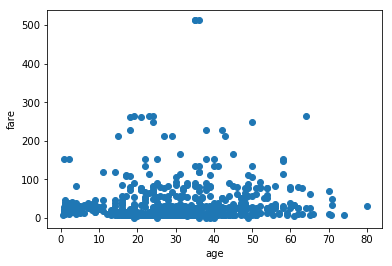

In [434]:
fig, ax = plt.subplots()
ax.scatter(x = train['Age'], y = train['Fare'])
plt.ylabel('fare')
plt.xlabel('age')
plt.show()

# Create a figure instance
#fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
#ax = fig.add_subplot(111)

# Create the boxplot
#bp = ax.boxplot(train['Age'])


In [435]:
train = train.drop(train[train['Fare']>450].index)

In [436]:
print("Train data: ", train.shape)
print("Test data: ", test.shape)

Train data:  (888, 11)
Test data:  (418, 10)


<h2> Missing Data </h2>

In [437]:
missing_data = (train.isnull().sum()/len(train))
missing_data = missing_data.drop(missing_data[missing_data==0].index).sort_values(ascending=False)
print(missing_data)

Cabin       0.772523
Age         0.199324
Embarked    0.002252
dtype: float64


<h2> Data Cleaning </h2>

<h3>Merge testing and training data for preprocessing</h3>

In [438]:
train_number = train.shape[0]
test_number = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)

all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,373450


<h3>Handling missing data</h3>

In [439]:
fill_means = ["Age"]

for fill_mean in fill_means:
    all_data[fill_mean]=all_data[fill_mean].fillna(all_data[fill_mean].mean())

In [440]:
fill_nones = ['Embarked']
for fill_none in fill_nones:
    all_data[fill_none]=all_data[fill_none].fillna('None')

<h3>Clearning irrelavant data</h3>

In [441]:
all_data.drop(['Cabin'], axis=1, inplace=True)
all_data.drop(['Name'], axis=1, inplace=True)
all_data.drop(['Ticket'], axis=1, inplace=True)
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0
3,35.0,S,53.1000,0,1,female,1
4,35.0,S,8.0500,0,3,male,0


<h3>Cleaning categorical data</h3>

In [442]:
cols = ['Sex', 'Embarked']
for col in cols:
    lb = LabelEncoder() 
    lb.fit(list(all_data[col].values)) 
    all_data[col] = lb.transform(list(all_data[col].values))
    
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,3,7.2500,0,3,1,1
1,38.0,0,71.2833,0,1,0,1
2,26.0,3,7.9250,0,3,0,0
3,35.0,3,53.1000,0,1,0,1
4,35.0,3,8.0500,0,3,1,0


<h1> Model Selection </h1>

In [443]:
'''
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train)
distances, indices = nbrs.kneighbors(train)
print (indices)
print(distances)
'''

"\nfrom sklearn.neighbors import NearestNeighbors\nnbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train)\ndistances, indices = nbrs.kneighbors(train)\nprint (indices)\nprint(distances)\n"

In [444]:
train = all_data[:train_number]
test = all_data[train_number:]

train["Survived"] = pd.Series(y_train).values

trainSet = train.values.tolist()
testSet = test.values.tolist()


C:\Users\Florence\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [445]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

def calculateProbability(x, mean, stdev):
	#return (1/(stdev*numpy.sqrt(2*numpy.pi)))*numpy.e**((-1)*((x-mean)**2/(2*stdev**2)))
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent


In [446]:
def nb(trainingSet, testSet):
    yes_rec = []
    no_rec = []
    for rec in trainingSet:
        if rec[-1] == 1:
            yes_rec.append(rec)
        else:
            no_rec.append(rec)

    numAttributes = len(trainingSet[0]) -1
    
    yes_mean_list = []
    no_mean_list = []    
    yes_sd_list = []
    no_sd_list = []
        
    for i in range (numAttributes):
        yes_mean_list.append( sum(list(zip(*yes_rec))[i])/float(len(yes_rec)))
        no_mean_list.append( sum(list(zip(*no_rec))[i])/float(len(no_rec)))
        yes_sd_list.append(stdev(list(zip(*yes_rec))[i]))
        no_sd_list.append(stdev(list(zip(*no_rec))[i]))

    yesP = float(len(yes_rec))/len(trainingSet)
    noP = float(len(no_rec))/len(trainingSet)
    result = []
    
    for t in testSet:
        yes_prob = yesP
        no_prob = noP
        for i in range (numAttributes):
            yes_prob*=calculateProbability(t[i], yes_mean_list[i], yes_sd_list[i])
            no_prob*=calculateProbability(t[i], no_mean_list[i], no_sd_list[i])
        if(no_prob > yes_prob):
            result.append(0)
            #print("no")
        else:
            result.append(1)
            #print("yes")
    return result

<h2> Export Result </h2>

In [447]:
result = nb(trainSet, testSet)
output = pd.DataFrame()

output['PassengerId']=pd.Series(test_ID).values
output['Survived']=pd.Series(result).values
output.to_csv("submission.csv", index = False)